## Sample decision tree code


In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

In [2]:
iris = load_iris()
X = iris['data'][:, 2:] #get petal length and width
y = iris['target']

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [4]:
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

graph = Source(export_graphviz(
        tree_clf,
        out_file = None,
        feature_names = iris.feature_names[2:],
        class_names = iris.target_names,
        rounded = True,
        filled = True
    ))

In [5]:
display(SVG(graph.pipe(format='svg')))

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Making Predictions

1. start at the root
1. for each feature
    1. test each split (binary is easier if continues, using binary split method) for each variable
    1. calculate gini impurity
1. select varible with lowest and split
1. for each node, perform step 2
1 until depth reached

### Geni Impurity ###

$G_i = 1 - \sum_{k=1}^np_{i,k}^2$

where $p_{i,k}$ is the ratio of k instances amoung the training instances of the $i^{th}$ node

For example (for left depth 2):

$G = 1 - sum((0/54)^2, (49/54)^2, (5/54)^2) = 0.168$ 

### Entropy ###
Comes from thermodunamics as a measure of molecular disorder: entropy approaches zero when all molecules are still and well ordered. It later spread to variet of domains, including Shannon's *information theory*, where it measures the average information content of a message: entropy is zero when all messages are identical. (reduction in entropy is also know as information gain)

$H_i = - \sum_(k=1)^n p_{i, k}log(p_{i, k})$

In this case

$-\frac{49}{54}log(\frac{49}{54}) - -\frac{5}{54}log(\frac{5}{54}) = 0.31$



### The CART training algorithm
CART is classification and regression tree, for each node it is trying to find the feature $k$ and threshold $t_k$ which produces the purest subsets. The cost function is basically the sum of weighted impurity functions.


$J(k,t_k) = \frac{m_{l}}{m}G_{l} + \frac{m_{r}}{m}G_{r}$

$m_l$ is the number of observations on the left, $G_l$ is the impurity of the left.



 ## Regularisation ##
 
Basically trees are easily over fitting, it is a *nonparametric model* unlike a linear model with predetermined number of parameters, so degree of freedom is already defined. The to **regularise**, use hyperparamters such as max-depth, min_samples_split, min_samples_leaf, etc. (discuss random forest later)

## Regression ##

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1, n_informative=1)

tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

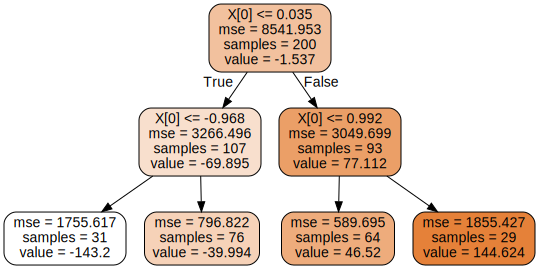

In [26]:
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

graph = Source(export_graphviz(
        tree_reg,
        out_file = None,
        rounded = True,
        filled = True
    ))
display(SVG(graph.pipe(format='svg')))

## CART function for regression ##

$J(k,t_k) = \frac{m_{l}}{m}MSE_{l} + \frac{m_{r}}{m}MSE_{r}$